Task 3: Customer Churn Prediction (Bank Customers)

In [2]:
#Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

In [15]:
# Load dataset:

df = pd.read_csv("Churn_Modeling.csv")
print(df.columns) 

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [6]:
# Preview dataset
print(df.shape)
df.head(15)

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


1. Handling Missing Values:

In [12]:
# Show missing values:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


2.  Remove Unnecessary Columns:

In [ ]:
#Step 1: Remove spaces in header:

df.columns = df.columns.str.strip() 
print(df.columns)  # now RowNumber will also show

# Step 2: Confirm column names:

print(df.columns.tolist())  # Make sure 'Loan_ID' appears correctly

#Some columns don’t help in prediction:

#RowNumber, CustomerId, Surname = just identifier 
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head(10)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


3. Advanced Visualization:

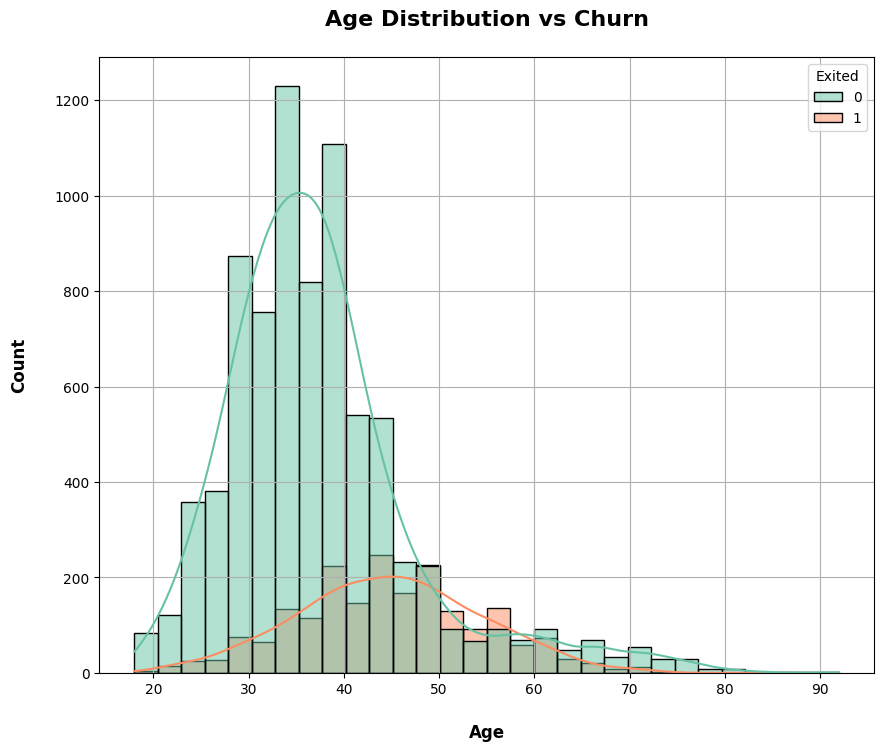

In [24]:
# Churn byy Age (Histogram):

plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, palette='Set2', bins=30)
plt.title("Age Distribution vs Churn\n", fontsize='16', fontweight='bold')
plt.xlabel("\nAge", fontsize='12', fontweight='bold')
plt.ylabel("Count\n", fontsize='12', fontweight='bold')
plt.grid(True)
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_384\2306906952.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y='Balance', palette='ocean')


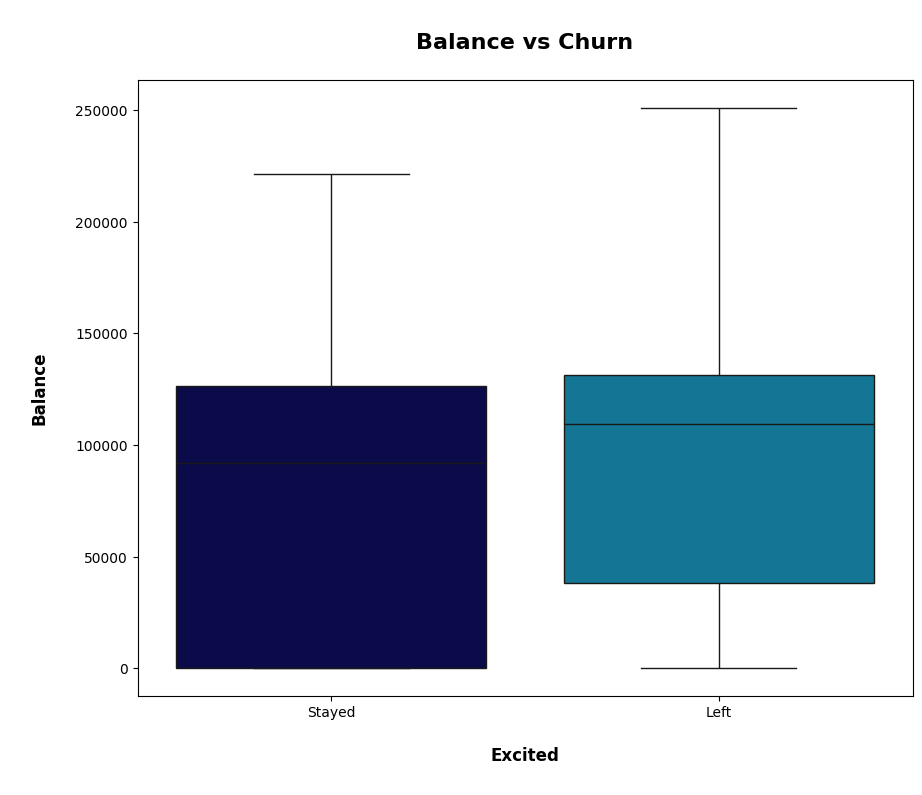

In [47]:
#Churn by Balance (Box Plot):

plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Exited', y='Balance', palette='ocean')
plt.title("\nBalance vs Churn\n",  fontsize='16', fontweight='bold')
plt.xlabel("\nExcited\n", fontsize='12', fontweight='bold')
plt.ylabel("\nBalance\n", fontsize='12', fontweight='bold')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

4. Encode Categorical Features:

In [ ]:
# 1st: Gender Encoding (Binary: LabelEncoder):

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Female=0, Male=1

In [121]:
# 2nd: One-Hot Encode Geography:

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

5. Preprocessing for Model:

In [73]:
# Step 1: Load data again to clean column names
df = pd.read_csv("Churn_Modeling.csv")
df.columns = df.columns.str.strip()  # Remove spaces in headers as Loan_ID wasn't appearing

# Step 2: Confirm column names
print(df.columns.tolist())  # Make sure 'Loan_ID' appears correctly

# Step 3: Drop Loan_ID
df.drop('RowNumber', axis=1, inplace=True)  # Now this won't give error

# Step 4: Encode categorical columns
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


6. Train-Test Split:

In [75]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
print(X_train.dtypes)

CustomerId           int64
Surname              int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object


In [78]:
#Check for Missing Values:

print(X_train.isnull().sum())
print(y_train.isnull().sum())

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64
0


In [80]:
print(X_train.shape)
print(y_train.shape)


(8000, 12)
(8000,)


7. Train with Decision Tree Classifier:

In [81]:
# Fit model:

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)


8. Evaluate Model:

Accuracy: 0.857 



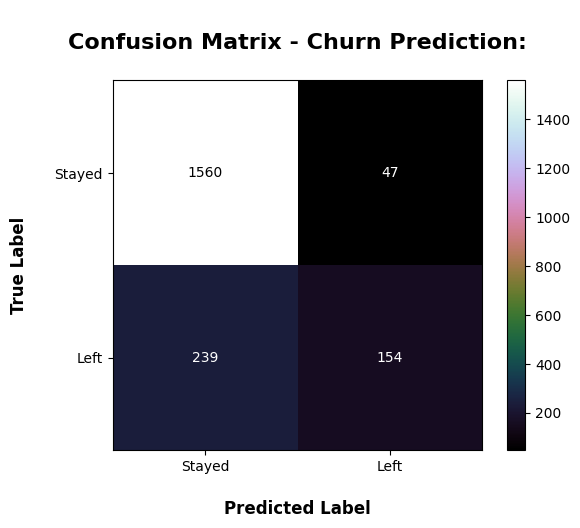

In [99]:
#Evaluate:
print("Accuracy:", accuracy_score(y_test, y_pred), "\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Stayed", "Left"])
disp.plot(cmap='cubehelix')
plt.title("\nConfusion Matrix - Churn Prediction:\n", fontsize='16', fontweight='bold')
plt.xlabel("\nPredicted Label", fontsize='12', fontweight='bold')
plt.ylabel("True Label\n", fontsize='12', fontweight='bold')
plt.show()


9. Feature Importance to understand what influences Churn:

C:\Users\PMLS\AppData\Local\Temp\ipykernel_384\334062424.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='CMRmap')


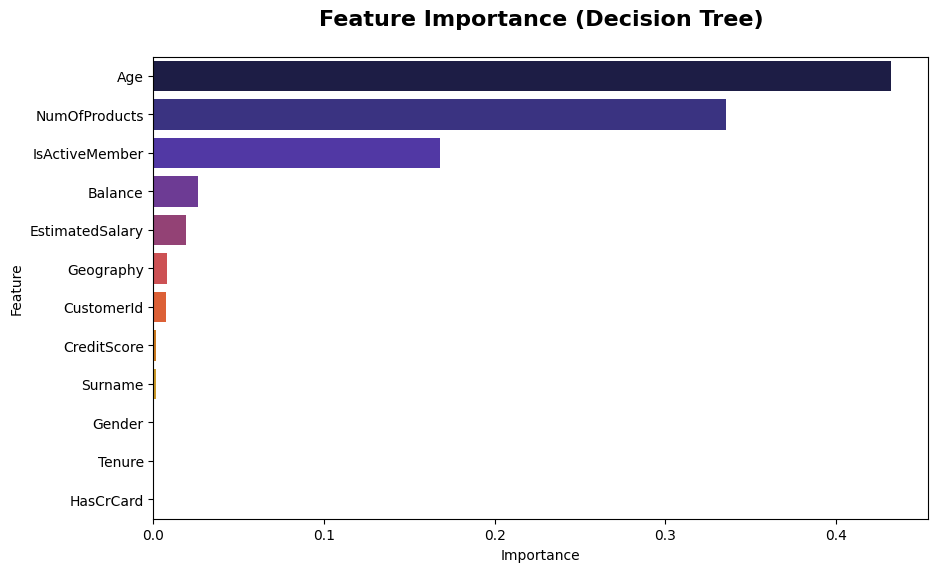

In [119]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Bar Plot:

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='CMRmap')
plt.title("Feature Importance (Decision Tree)\n", fontsize='16', fontweight='bold')
plt.show()